In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os dados
data = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# Exibir linhas dos dados
print(data.head())

# Remove linhas com valores ausentes
data = data.dropna()

# Exibir a contagem de valores ausentes
print(data.isnull().sum())

# Verificar as variáveis categóricas
print(data['Country'].unique())

# Codificar a variável categórica 'Country' usando one-hot encoding
data = pd.get_dummies(data, columns=['Country'], drop_first=True)

# Definir variáveis independentes (X) e dependentes (y)
X = data.drop(columns=['dt', 'AverageTemperature'])
y = data['AverageTemperature']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Regressão Linear
model = LinearRegression()



           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64
['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua And Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bonaire, Saint Eustatius And Saba'
 'Bosnia And Herzegovina' 'Botswana' 'Brazil' 'British Virgin

Model: Linear Regression
Best Params: {'fit_intercept': True}
MAE: 4.045812729771804
RMSE: 5.6650155959068975
R2 Score: 0.7332297402655111


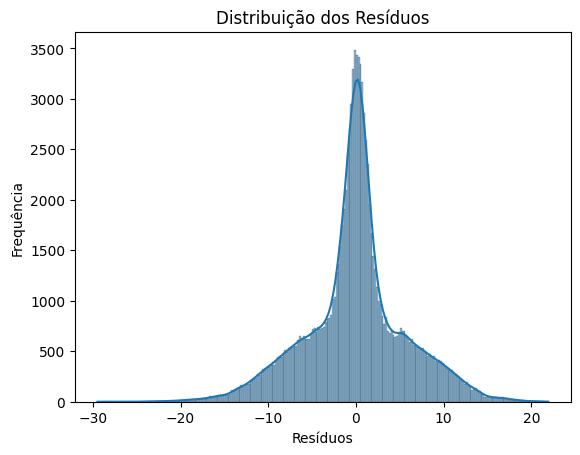

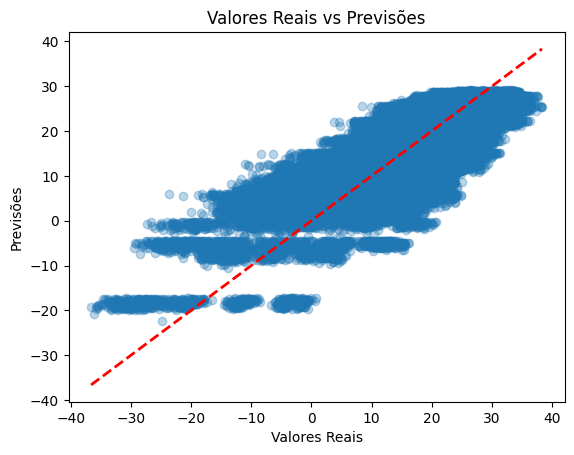

In [ ]:
# Definir os parâmetros para o GridSearchCV
params = {
    'fit_intercept': [True, False]
}

# GridSearch CV
grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo usando o erro absoluto médio (MAE), o erro quadrático médio (RMSE) e o R2 Score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"Model: Linear Regression")
print(f"Best Params: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Visualizar os resíduos
sns.histplot(y_test - y_pred, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Visualizar a relação entre as previsões e os valores reais
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.show()